In [1]:
# import mne
# file = "chbmit2\\chb01\\chb01_01.edf"
# data = mne.io.read_raw_edf(file)
# raw_data = data.get_data()
# # you can get the metadata included in the file and a list of all channels:
# info = data.info
# channels = data.ch_names

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, TimeDistributed, Bidirectional, LSTM, Input, UpSampling2D
from tensorflow.keras.optimizers import RMSprop
import pyedflib as ped


In [4]:
file = "chbmit2\\chb01\\chb01_01.edf"
signals1, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 15.61it/s]


In [5]:
file = "chbmit2\\chb01\\chb01_02.edf"
signals2, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 16.01it/s]


In [6]:
file = "chbmit2\\chb01\\chb01_03.edf"
signals3, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 16.19it/s]


In [7]:
file = "chbmit2\\chb01\\chb01_04.edf"
signals4, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 15.80it/s]


In [8]:
file = "chbmit2\\chb01\\chb01_05.edf"
signals5, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 15.28it/s]


In [4]:
X1 = np.load('npy arrays\sig01-10.npy')

In [9]:
signals =  np.concatenate((signals1, signals2, signals3, signals4, signals5), axis=1)

In [5]:
np.shape(X1)

(9216000, 23)

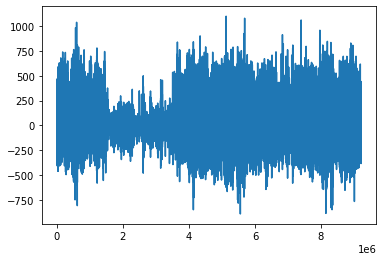

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(9216000),X1.transpose()[0])
plt.show()

In [22]:
signals = signals.transpose()

In [23]:
np.shape(signals)

(23, 4608000)

In [24]:
X = np.reshape(signals,(3600,1280,23))#.swapaxes(1,2)

In [25]:
np.shape(X)

(3600, 1280, 23)

In [26]:
y = np.zeros((np.shape(X)[0]))

In [27]:
y.shape

(3600,)

In [28]:
np.sum(y)

0.0

In [29]:
y[2038:2047] = 2
y[1318:1327] = 1

In [30]:
y[2452:2458] = 2
y[1732:1738] = 1

In [31]:
y

array([0., 0., 0., ..., 0., 0., 0.])

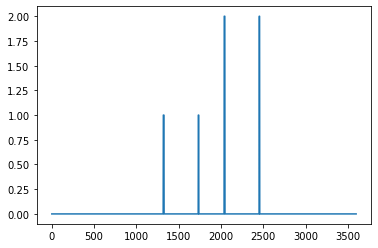

In [32]:
plt.plot(range(3600),y)
plt.show()

In [33]:
X=np.expand_dims(X,axis=3)
X_test=np.expand_dims(X_test,axis=3)

NameError: name 'X_test' is not defined

In [34]:
np.shape(X)

(3600, 1280, 23, 1)

In [40]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 2),input_shape = (1280,23,1),activation='relu', padding='same'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, (3, 2), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, (3, 2), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Flatten())

# cnn.add(Bidirectional(LSTM(32,return_sequences=False)))
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(3,activation='softmax'))


# cnn.add(Dense(128, activation='relu'))
# cnn.add(Dense(3, activation='softmax'))


In [97]:
cnn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 1280, 23, 32)      224       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 640, 11, 32)       0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 640, 11, 32)       128       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 638, 10, 32)       6176      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 319, 5, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 319, 5, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 317, 4, 32)      

In [66]:
# model = Sequential()

# model.add(TimeDistributed(cnn, input_shape = (3600,1280,23,1)))

# model.add(Bidirectional(LSTM(32,return_sequences=False)))

# model.add(Dense(64,activation='relu'))

# model.add(Dense(32,activation='relu'))

# model.add(Dense(3,activation='softmax'))

ValueError: Input 0 of layer conv2d_6 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 3600, 1280, 23]

In [91]:
# model = Sequential()
# model.add(Conv2D(32, (3, 2),input_shape = (1280,23,1),activation='relu', padding='same'))
# model.add(MaxPool2D((2, 2)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 2), activation='relu'))
# model.add(MaxPool2D((2, 2)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 2), activation='relu'))
# model.add(MaxPool2D((2, 2)))
# model.add(Flatten())

# model.add(LSTM(50, input_shape=(3600,10112)))

# model.add(Dense(3))

# model.compile(loss='mae', optimizer='adam')

ValueError: Input 0 of layer lstm_9 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 10112]

In [43]:
cnn.compile(optimizer='rmsprop',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])
hist = cnn.fit(X_test,y_test,epochs=5)#validation_data=(X_test,y_test)

Epoch 1/15
158/158 [==============================] - 4s 26ms/step - loss: 0.2936 - acc: 0.9764
Epoch 2/15
158/158 [==============================] - 4s 26ms/step - loss: 0.1076 - acc: 0.9833
Epoch 3/15
158/158 [==============================] - 4s 26ms/step - loss: 0.0492 - acc: 0.9903
Epoch 4/15
158/158 [==============================] - 4s 26ms/step - loss: 0.0321 - acc: 0.9919
Epoch 5/15
158/158 [==============================] - 4s 26ms/step - loss: 0.0393 - acc: 0.9923
Epoch 6/15
158/158 [==============================] - 4s 26ms/step - loss: 0.0224 - acc: 0.9958
Epoch 7/15
158/158 [==============================] - 4s 26ms/step - loss: 0.0108 - acc: 0.9972
Epoch 8/15
158/158 [==============================] - 4s 26ms/step - loss: 0.0102 - acc: 0.9972
Epoch 9/15
158/158 [==============================] - 4s 26ms/step - loss: 0.0028 - acc: 0.9988
Epoch 10/15
158/158 [==============================] - 4s 26ms/step - loss: 0.0179 - acc: 0.9988
Epoch 11/15
158/158 [==================

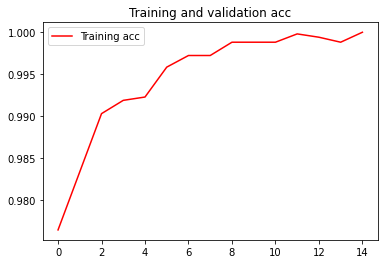

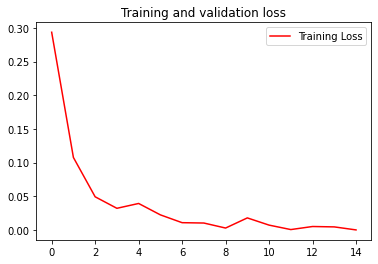

In [44]:
acc = hist.history['acc']# Your Code Here
loss = hist.history['loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
cnn.save('mod.h5')

In [3]:
cnn = tf.keras.models.load_model('mod.h5')

In [44]:
results = cnn.predict(X)
results = np.argmax(results,axis = 1)

# results = pd.Series(results,name="Label")

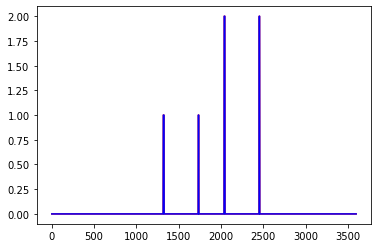

In [46]:
plt.plot(range(3600),y,'red')
plt.plot(range(3600),results,'blue')


plt.show()

In [104]:
np.sum(y)

45.0

In [4]:
file = "chbmit2\\chb01\\chb01_11.edf"
signals11, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 16.00it/s]


In [5]:
file = "chbmit2\\chb01\\chb01_12.edf"
signals12, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 15.97it/s]


In [6]:
file = "chbmit2\\chb01\\chb01_13.edf"
signals13, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 15.83it/s]


In [7]:
file = "chbmit2\\chb01\\chb01_14.edf"
signals14, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 16.21it/s]


In [8]:
file = "chbmit2\\chb01\\chb01_15.edf"
signals15, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 16.02it/s]


In [9]:
file = "chbmit2\\chb01\\chb01_16.edf"
signals16, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 16.07it/s]


In [10]:
file = "chbmit2\\chb01\\chb01_17.edf"
signals17, sig_headers, header = ped.highlevel.read_edf(file, ch_nrs=None, ch_names=None, digital=False, verbose=True)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 15.83it/s]


In [33]:
signals_test =  np.concatenate((signals11,signals12,signals13,signals14, signals15, signals16, signals17), axis=1)

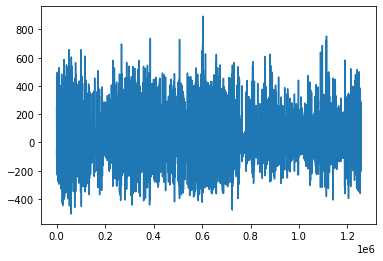

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1256000),signals_test[0][1483200:2739200])
plt.show()

In [23]:
np.shape(signals_test)

(23, 3686400)

In [35]:
X_test = np.reshape(signals_test.transpose(),(5040,1280,23))

In [36]:
np.shape(X_test)

(5040, 1280, 23)

In [37]:
y_test = np.zeros((np.shape(X_test)[0]))

In [38]:
y_test.shape

(5040,)

In [28]:
y_test[1066:1076] = 2
y_test[346:356] = 1

y_test[1643:1654] = 2
y_test[923:934] = 1

In [39]:
y_test[3226:3236] = 2
y_test[2506:2516] = 1

y_test[3803:3814] = 2
y_test[3083:3094] = 1

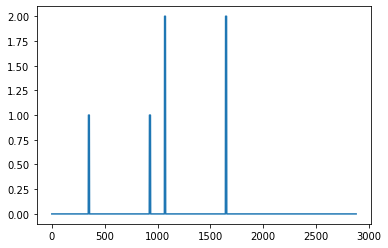

In [29]:
plt.plot(range(2880),y_test)
plt.show()

In [42]:
X_test = np.expand_dims(X_test,axis=3)

In [50]:
cnn.evaluate(X_test,y_test)

158/158 [==============================] - 2s 10ms/step - loss: 0.0534 - acc: 0.9899


[0.05341543257236481, 0.9898809790611267]

In [46]:
results = cnn.predict(X_test)
results = np.argmax(results,axis = 1)

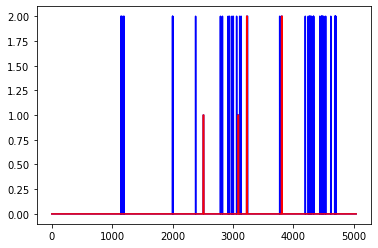

In [49]:
plt.plot(range(5040),results,'blue')
plt.plot(range(5040),y_test,'red')

plt.show()

In [2]:
import numpy as np

In [3]:
test = np.arange(120)

In [8]:
test

array([[  0,  30,  60,  90],
       [  1,  31,  61,  91],
       [  2,  32,  62,  92],
       [  3,  33,  63,  93],
       [  4,  34,  64,  94],
       [  5,  35,  65,  95],
       [  6,  36,  66,  96],
       [  7,  37,  67,  97],
       [  8,  38,  68,  98],
       [  9,  39,  69,  99],
       [ 10,  40,  70, 100],
       [ 11,  41,  71, 101],
       [ 12,  42,  72, 102],
       [ 13,  43,  73, 103],
       [ 14,  44,  74, 104],
       [ 15,  45,  75, 105],
       [ 16,  46,  76, 106],
       [ 17,  47,  77, 107],
       [ 18,  48,  78, 108],
       [ 19,  49,  79, 109],
       [ 20,  50,  80, 110],
       [ 21,  51,  81, 111],
       [ 22,  52,  82, 112],
       [ 23,  53,  83, 113],
       [ 24,  54,  84, 114],
       [ 25,  55,  85, 115],
       [ 26,  56,  86, 116],
       [ 27,  57,  87, 117],
       [ 28,  58,  88, 118],
       [ 29,  59,  89, 119]])

In [5]:
test = test.reshape(4,30)

In [7]:
test = test.transpose()

In [9]:
np.reshape(test,(6,5,4))
# X = np.reshape(signals,(3600,1280,23))

array([[[  0,  30,  60,  90],
        [  1,  31,  61,  91],
        [  2,  32,  62,  92],
        [  3,  33,  63,  93],
        [  4,  34,  64,  94]],

       [[  5,  35,  65,  95],
        [  6,  36,  66,  96],
        [  7,  37,  67,  97],
        [  8,  38,  68,  98],
        [  9,  39,  69,  99]],

       [[ 10,  40,  70, 100],
        [ 11,  41,  71, 101],
        [ 12,  42,  72, 102],
        [ 13,  43,  73, 103],
        [ 14,  44,  74, 104]],

       [[ 15,  45,  75, 105],
        [ 16,  46,  76, 106],
        [ 17,  47,  77, 107],
        [ 18,  48,  78, 108],
        [ 19,  49,  79, 109]],

       [[ 20,  50,  80, 110],
        [ 21,  51,  81, 111],
        [ 22,  52,  82, 112],
        [ 23,  53,  83, 113],
        [ 24,  54,  84, 114]],

       [[ 25,  55,  85, 115],
        [ 26,  56,  86, 116],
        [ 27,  57,  87, 117],
        [ 28,  58,  88, 118],
        [ 29,  59,  89, 119]]])